## Домашнее задание от 24.10.2024

##### Ваша задача: предсказать клиентов, которые намереваются уйти (churn). Необходимо продемонстрировать этапы подготовки данных:
##### Корректность загрузки
##### Проверка на пропуски
##### Проверка на аномалии
##### Группировки данных по категориям в зависимости от целевой переменной (выводы о данных, например, отток по типу карты)
##### Визуализации: гистограммы, тепловые карты, pairplot-ы, violin
##### Кодирование данных (через one-hot и через уникальное значение)
### Признаки и их значение 
###### churn - ушедший (Attrited) или текущий (Existing) клиент
###### Customer_Age - Демографическая переменная-возраст клиента в годах
###### Gender - Демографические переменные - M=мужской, F=женский
###### Dependent_count - Демографическая переменная-число иждивенцев
###### Education_Level - Демографическая переменная - образовательная квалификация владельца счета (пример: средняя школа, выпускник колледжа и т. д.)
###### Marital_Status - Демографическая переменная-женат, холост, разведен, неизвестен
###### Income_Category - Демографическая переменная - категория годового дохода владельца счета (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, неизвестно)
###### Card_Category - Переменная продукта-Тип карты (Синяя, серебряная, золотая, Платиновая)
###### Months_on_book - Период взаимоотношений с банком
###### Total_Relationship_Count - Общее количество продуктов, находящихся у клиента
###### Months_Inactive_12_mon - Количество месяцев бездействия за последние 12 месяцев
###### Contacts_Count_12_mon - Количество контактов за последние 12 месяцев
###### Credit_Limit - Кредитный лимит по кредитной карте
###### Total_Revolving_Bal - Общий оборотный остаток на кредитной карте
###### Avg_Open_To_Buy - Открытая для покупки кредитная линия (в среднем за последние 12 месяцев)
###### Total_Amt_Chng_Q4_Q1 - Изменение суммы сделки (4 квартал по сравнению с 1 кварталом)
###### Total_Trans_Amt - Общая сумма сделки (за последние 12 месяцев)
###### Total_Trans_Ct - Общее количество транзакций (за последние 12 месяцев)
###### Total_Ct_Chng_Q4_Q1 - Изменение количества транзакций (Q4 по сравнению с Q1)
###### Avg_Utilization_Ratio - Средний Коэффициент Использования Карт

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import sklearn.base 

seed = 24

### Выводим верхние и нижние элементы таблицы

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.tail()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

(10127, 20)

In [5]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Смотрим дупликаты и null

In [6]:
num_duplicated = df.duplicated().sum()
f'{num_duplicated} дупликатов найдено'

'0 дупликатов найдено'

<Axes: >

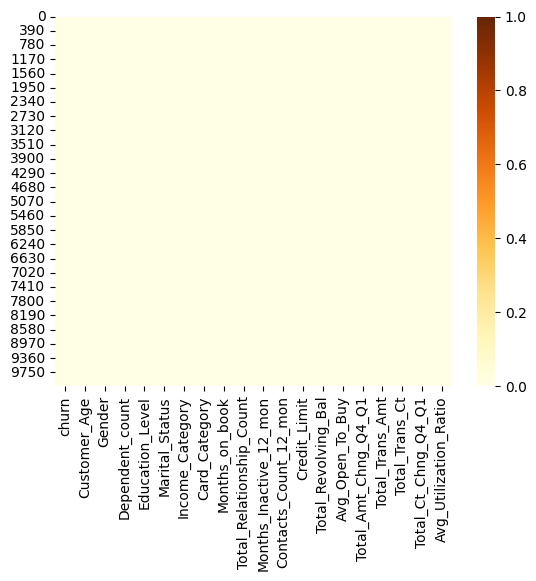

In [7]:
sns.heatmap(df.isnull(), cmap='YlOrBr', vmin=0, vmax=1)

### Дубликатов и пустых значений нет, значит, смотрим выбросы

In [8]:
df_select_out = df[df.columns[11:]]
outlier_cols = []

for column in df_select_out.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_select_out[column].quantile(0.25)
    Q3 = df_select_out[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_select_out[column] < Q1 - 1.5 * IQR) | (df_select_out[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

# Print columns with outliers
print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


### Больше всего выбросов в Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1

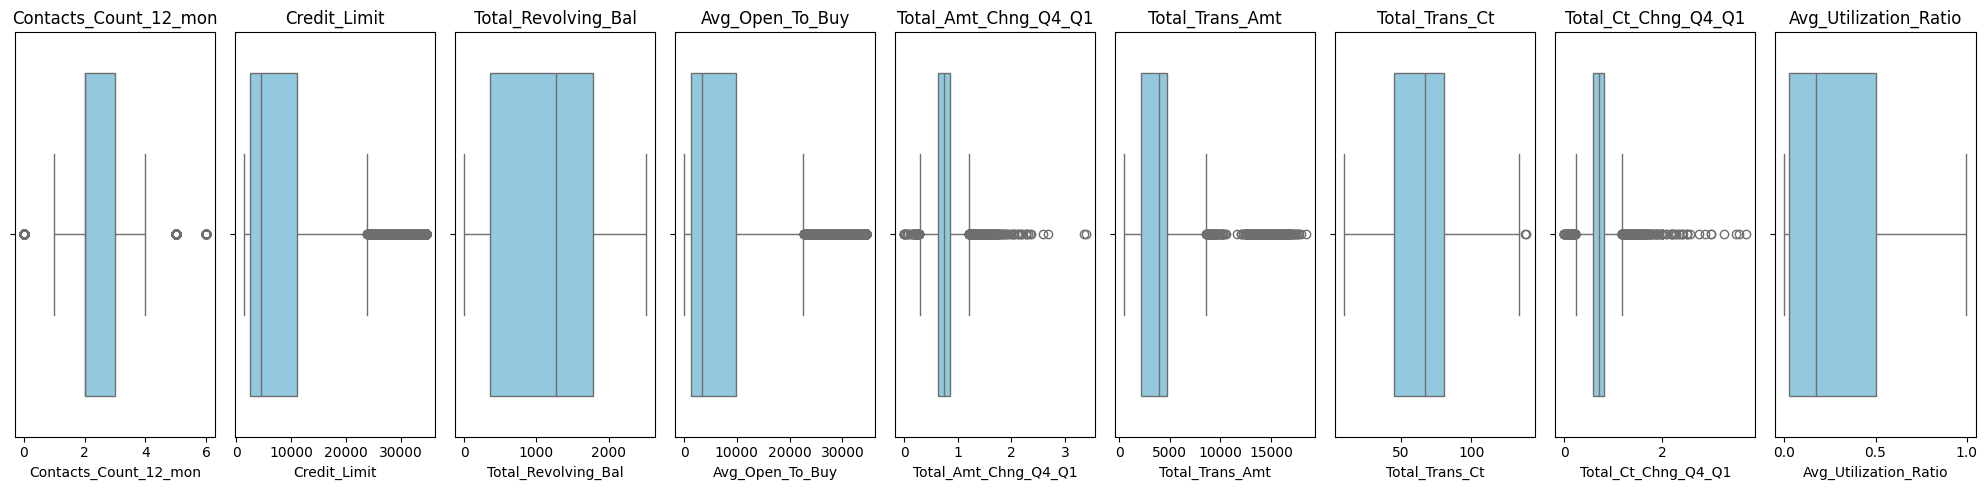

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_select_out.columns), figsize=(20, 5))

# Create box plots for each column
for i, column in enumerate(df_select_out.columns):
    sns.boxplot(x=df_select_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

### Обработка выбросов (просто удалю)

In [10]:
outlier_cols.remove('Contacts_Count_12_mon')
outlier_cols.remove('Total_Trans_Ct')
def del_outliers(frame, column):
    Q1 = frame[column].quantile(0.25)
    Q3 = frame[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return frame[(frame[column] >= lower_bound) & (frame[column] <= upper_bound)]

for col in outlier_cols:
    df = del_outliers(df, col)
df.reset_index(drop=True, inplace=True)

In [11]:
df['Customer_Age'].unique()
avg_revolving = df.groupby('Customer_Age')['Total_Revolving_Bal'].mean().reset_index()

### Просто график, решил попробовать вывести 

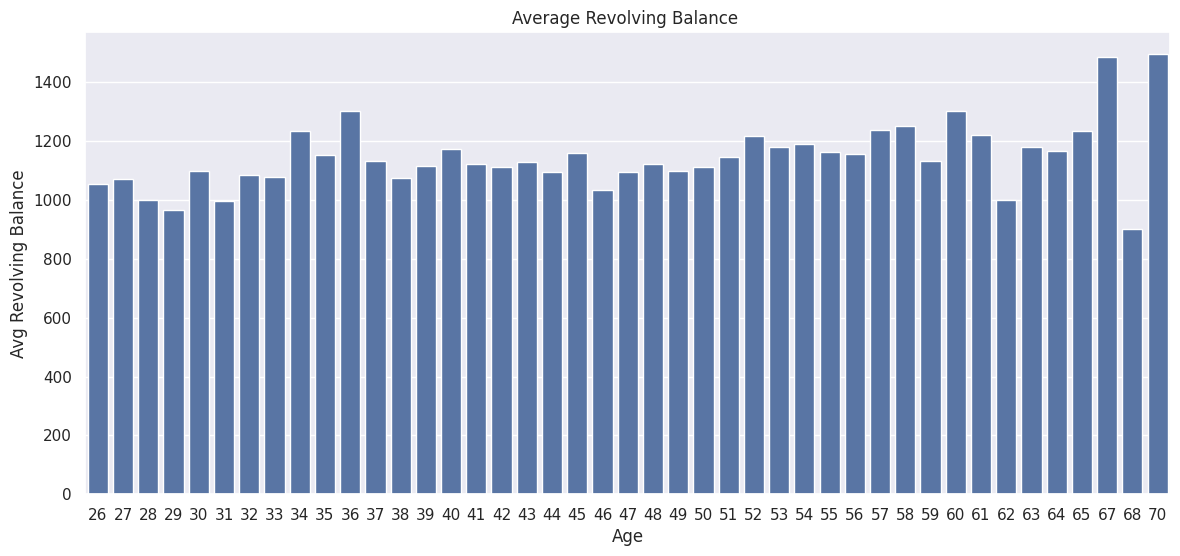

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 6))
sns.barplot(x='Customer_Age', y='Total_Revolving_Bal', data=avg_revolving)
plt.title('Average Revolving Balance ')
plt.xlabel('Age')
plt.ylabel('Avg Revolving Balance')

plt.show()

In [13]:
df['Card_Category'].value_counts()
aim = df['churn']

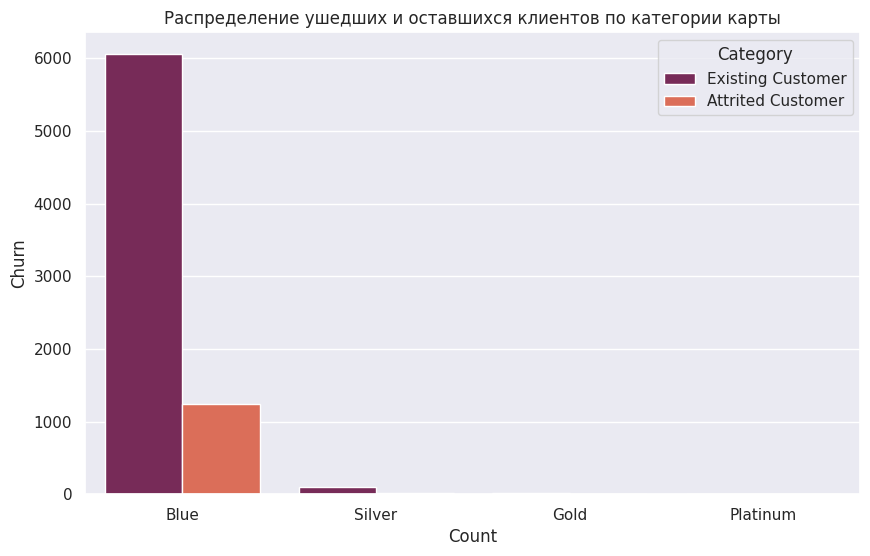

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', hue='churn', data=df, palette='rocket')
plt.ylabel('Churn')
plt.xlabel('Count')
plt.title('Распределение ушедших и оставшихся клиентов по категории карты')
plt.legend(title='Category')

### Очень мало человек осталось, соу почти ничего не видно в 3 последних столбцах
### Также сделаю несколько круговых диаграмм

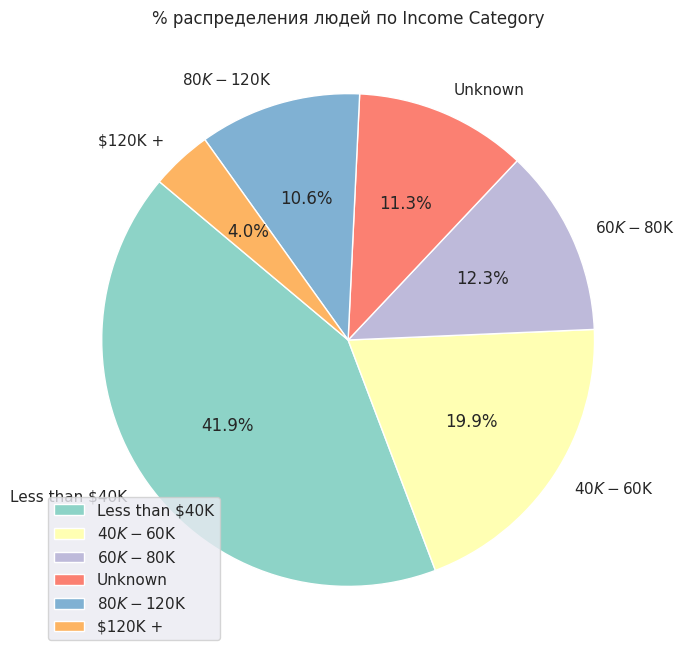

In [15]:
income_types = df['Income_Category'].value_counts()
# income_types - количество каждого unique значения
plt.figure(figsize=(8, 8))
plt.pie(income_types, labels=income_types.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

plt.legend()
plt.title('% распределения людей по Income Category')
plt.show()

/tmp/ipykernel_220331/1948594287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_select_out, x=df['Income_Category'], y=df['Customer_Age'], palette='mako')


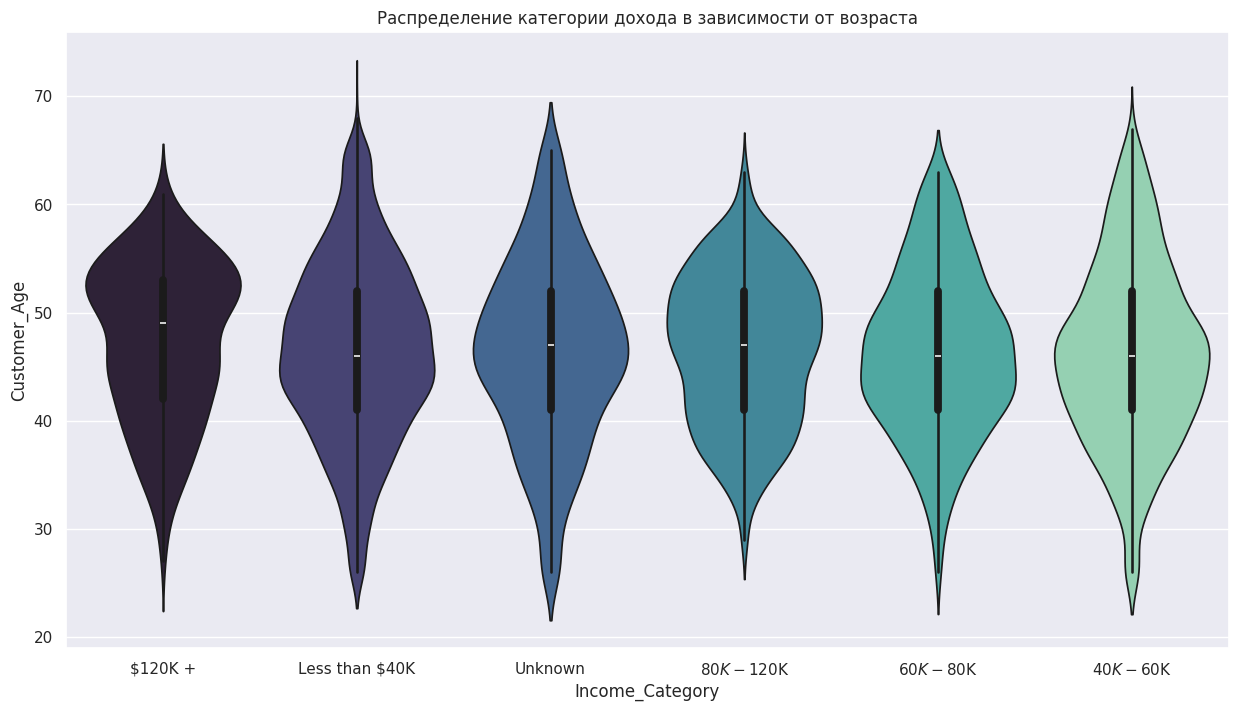

In [16]:
plt.figure(figsize=(15, 8))
sns.violinplot(df_select_out, x=df['Income_Category'], y=df['Customer_Age'], palette='mako')
plt.xlabel('Income_Category')
plt.ylabel('Customer_Age')
plt.title('Распределение категории дохода в зависимости от возраста')
plt.show()

### Закодируем object в int

Сначала сохраним категориальные и вещественные значения 

In [17]:
target = 'churn'
categorial_columns = [key for key in df.keys() if df[key].dtype == 'object']
continuos_columns = [key for key in df.keys() if df[key].dtype in ('int64', 'float64')]

categorial_columns.remove(target)

categorial_columns, continuos_columns

(['Gender',
  'Education_Level',
  'Marital_Status',
  'Income_Category',
  'Card_Category'],
 ['Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'])

In [18]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df[cat_columns])
df[cat_columns] = encoded_data.astype(int)
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
1,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
2,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
3,0,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
4,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,0,48,1,4,0,1,3,0,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
7430,0,33,0,1,1,2,4,0,15,1,1,3,3709.0,1180,2529.0,0.645,8130,74,0.897,0.318
7431,0,49,0,4,5,1,1,0,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
7432,0,52,0,5,6,1,4,0,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


### Existing customer - 1, Attrited customer - 0

In [25]:
df['churn'].value_counts()

churn
1    6174
0    1260
Name: count, dtype: int64

### Корреляция всех значений

<Axes: >

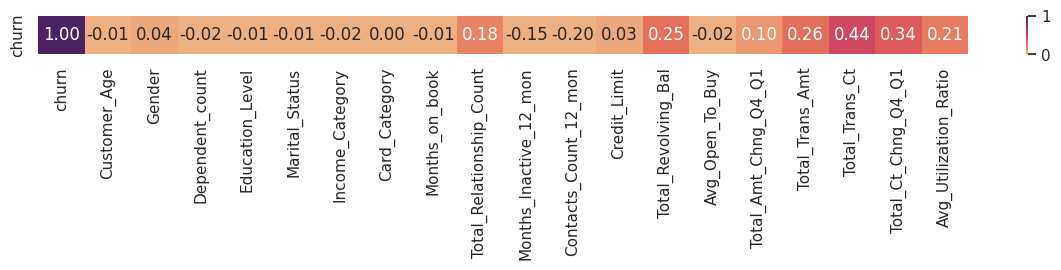

In [19]:
plt.figure(figsize=(15,0.5))
sns.heatmap(df.corr().loc[['churn']], annot=True, vmax=1, vmin=0, cmap=sns.color_palette('flare', as_cmap=True), fmt='.2f')

<Axes: >

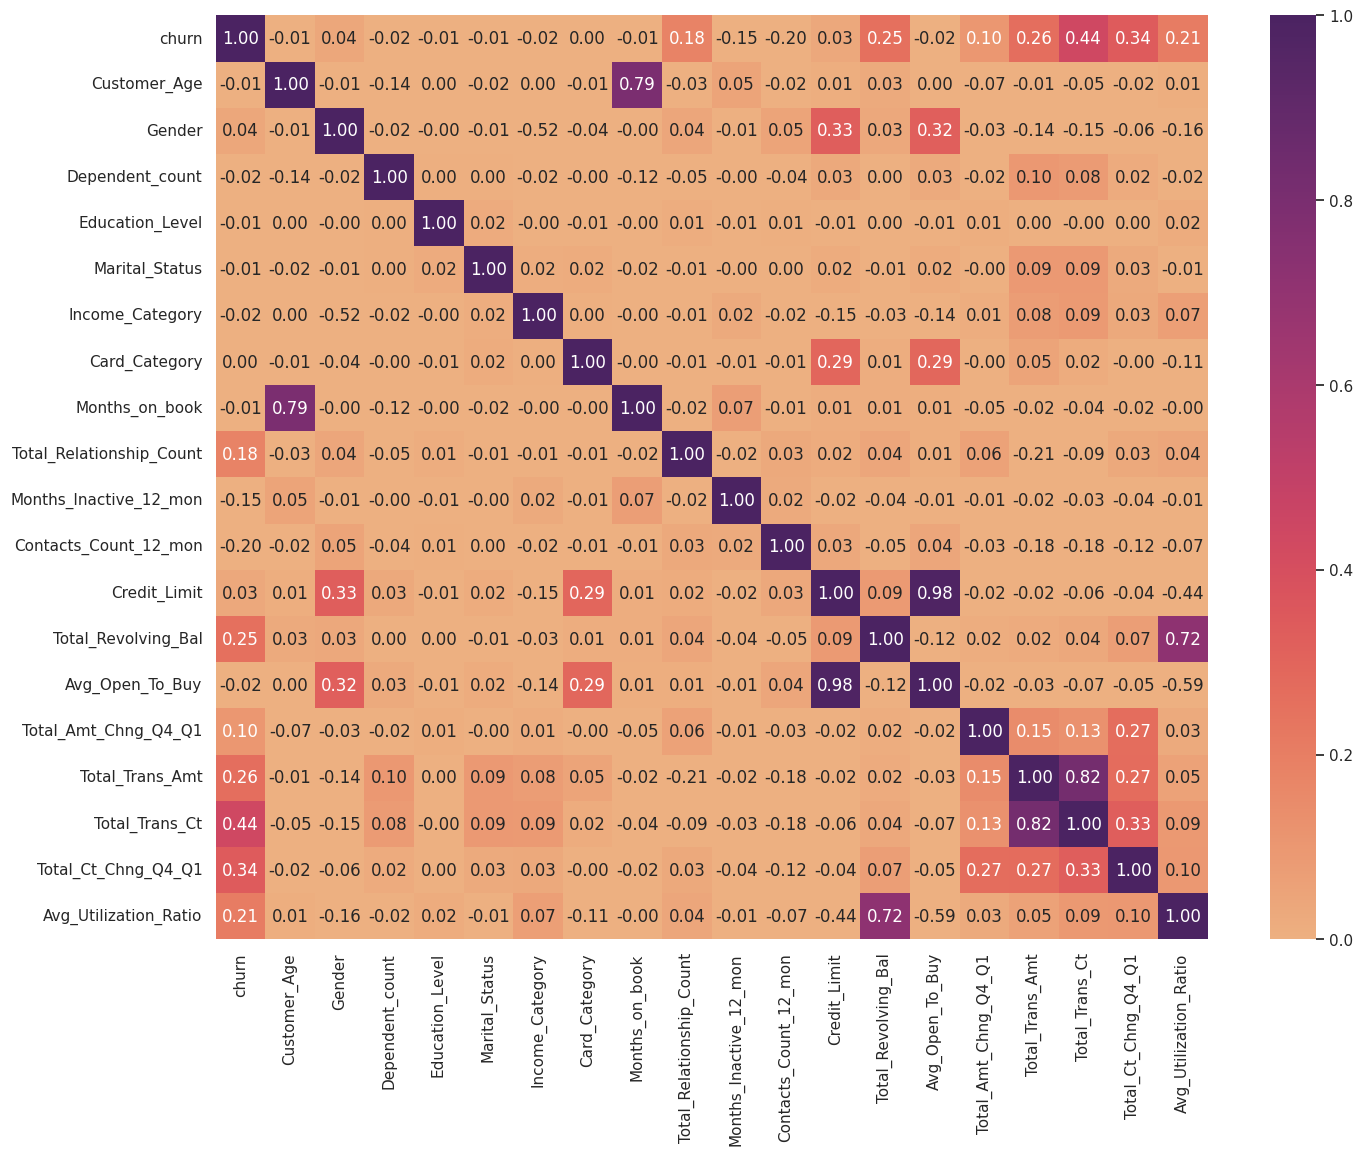

In [20]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=0, cmap='flare', fmt='.2f')

In [21]:
df.to_csv('new_churn.csv', index=False)

##### Видим, что целевая переменная коррилерирует в основном:
##### Total_Trans_Ct - Общее количество транзакций (за последние 12 месяцев)¶
##### Total_Ct_Chng_Q4_Q1 - Изменение количества транзакций (Q4 по сравнению с Q1)
##### Total_Revolving_Bal - Общий оборотный остаток на кредитной карте
##### Total_Trans_Amt - Общая сумма сделки (за последние 12 месяцев)
##### Также можно рассмотреть цепную корреляцию по столбцам: 
##### Total_Revolving_Bal -> Avg_Utilization_Ratio -> churn
##### Total_Trans_Ct -> Total_Ct_Chng_Q4_Q1 -> churn